In [33]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import load_model
print(tf.__version__)

1.10.0


In [34]:
learning_rate = 0.01
epochs_value = 10
batch_size_value = 128

In [35]:
def plot_images(images, cls_true, cls_pred=None):
    
    fig, axes = plt.subplots(1, 5)
    fig.subplots_adjust(hspace=1, wspace=0.2)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(28,28), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "Actual: {0}".format(cls_true[i])
        else:
            xlabel = "Actual: {0},\n Prediction: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

NameError: name 'plt' is not defined

## Load Data

In [8]:
(nx_train, y_train), (nx_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Initial Training Dataset: ", y_train.shape, nx_train.shape)
print("Initial Testing Dataset: ", y_test.shape, nx_test.shape)

Initial Training Dataset:  (60000,) (60000, 28, 28)
Initial Testing Dataset:  (10000,) (10000, 28, 28)


In [9]:
print(nx_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
plot_images(nx_train[100:105], y_train[100:105], cls_pred=None)

NameError: name 'plot_images' is not defined

## Normalize Input Dataset

In [7]:
x_train = tf.keras.utils.normalize(nx_train, axis=1)
x_test = tf.keras.utils.normalize(nx_test, axis=1)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

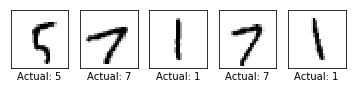

In [9]:
plot_images(nx_train[100:105], y_train[100:105], cls_pred=None)

## One hot coding

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Convert dataset to Flat format

In [11]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
nx_train = nx_train.reshape(nx_train.shape[0], 28*28)
nx_test = nx_test.reshape(nx_test.shape[0], 28*28)
print("Training : ", y_train.shape, x_train.shape)
print("Testing  : ", y_test.shape, x_test.shape)

Training :  (60000, 10) (60000, 784)
Testing  :  (10000, 10) (10000, 784)


## Build DNN using Keras 

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(28*28, activation="relu", input_shape=(28*28,)))
#model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [13]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation="relu")) 
#model1.add(tf.keras.layers.Dense(128, activation="relu")) 
model1.add(tf.keras.layers.Dense(10, activation="softmax"))

In [14]:
#model.save_weights('sim_score_weights.h5', overwrite=True)

## Using Optimization Algorithm for Backpropagation

In [15]:
model.compile(optimizer='adam', 
              loss="categorical_crossentropy",
              metrics=['accuracy'])

## Training Phase

In [16]:
training_model = model.fit(x_train, y_train, 
                           batch_size=batch_size_value, 
                           epochs=epochs_value,
                           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.3095 - acc: 0.9159 - val_loss: 0.1680 - val_acc: 0.9489
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1264 - acc: 0.9633 - val_loss: 0.1119 - val_acc: 0.9670
Epoch 3/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0818 - acc: 0.9760 - val_loss: 0.0969 - val_acc: 0.9712
Epoch 4/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0585 - acc: 0.9828 - val_loss: 0.0787 - val_acc: 0.9762
Epoch 5/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0425 - acc: 0.9879 - val_loss: 0.0764 - val_acc: 0.9744
Epoch 6/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0319 - acc: 0.9909 - val_loss: 0.0708 - val_acc: 0.9786
Epoch 7/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0236 - acc: 0.9938 - val_loss: 0.0740 - 

In [17]:
#training_model.history['val_loss']
#training_model.history['val_acc']

In [18]:
model.save('model.keras', overwrite=True)

## Evaluation Phase

In [19]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 52us/step


In [20]:
for name, value in zip(model.metrics_names, result):
    print (name, value)

loss 0.0731326325359987
acc 0.9784


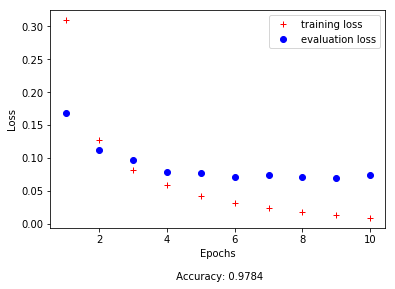

In [21]:
plt.plot(range(1,epochs_value+1), training_model.history['loss'], 'r+', label='training loss')
plt.plot(range(1,epochs_value+1), training_model.history['val_loss'], 'bo', label='evaluation loss')
plt.xlabel('Epochs\n\n Accuracy: '+str(value))
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
from tensorflow.python.keras.models import load_model
model3 = load_model('model.keras')

## Predication Phase

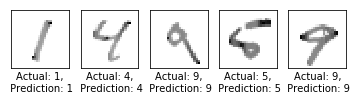

In [23]:
R_img = range (5,10)
plot_images(x_test[R_img], np.argmax(y_test[R_img],axis=1), np.argmax(model3.predict(x_test[R_img]), axis=1))